# Connection- Extract Data from Postgres Database server

In [1]:
#pip install psycopg2

In [2]:
# POstGreSQL GUI client is PgAdmin & backend python client is psycopg2

import psycopg2 as pg2;
import pandas as pd;

In [3]:
# secret = 'your password goes here'

In [4]:
# Connect to Postgres DB server, if db server installed on your m/c, localhost
# else ip address of the db server

conn = pg2.connect(host = 'localhost', 
                   port = 5432,
                   user='postgres', 
                   password=secret,
                   database = 'telco')

In [5]:
# Retrieve cursor
# Cursor is control structure that enables traversal over records in a db
# Like a iterator/pointer for sql data retrieval

cur = conn.cursor()

In [6]:
# Use cursor object and execute sql queries

#cur.execute('SELECT gender,tenure FROM dashboard.customer;')
cur.execute('SELECT gender,"Contract","Churn" FROM dashboard.customer;')



In [7]:
record = cur.fetchone()
record

('Female', 'Month-to-month', 'No')

In [8]:
records = cur.fetchmany(3)
records

[('Male', 'One year', 'No'),
 ('Male', 'Month-to-month', 'Yes'),
 ('Male', 'One year', 'No')]

In [9]:
data_list = cur.fetchall()

In [10]:
(data_list[0:5])

[('Female', 'Month-to-month', 'Yes'),
 ('Female', 'Month-to-month', 'Yes'),
 ('Male', 'Month-to-month', 'No'),
 ('Female', 'Month-to-month', 'No'),
 ('Female', 'Month-to-month', 'Yes')]

In [11]:
conn.close()

In [12]:
df = pd.DataFrame (data_list, columns = ['gender','Contract','Churn'])

In [13]:
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,gender,Contract,Churn
0,Female,Month-to-month,Yes
1,Female,Month-to-month,Yes
2,Male,Month-to-month,No
3,Female,Month-to-month,No
4,Female,Month-to-month,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7028 entries, 0 to 7027
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gender    7028 non-null   object
 1   Contract  7028 non-null   object
 2   Churn     7028 non-null   object
dtypes: object(3)
memory usage: 164.8+ KB


In [15]:
## You need Churn Yes or no count in form of Pie chart

In [16]:
churn_s = df['Churn'].value_counts()

In [17]:
churn_s

No     5160
Yes    1868
Name: Churn, dtype: int64

In [18]:
# Pie Chart for Churn

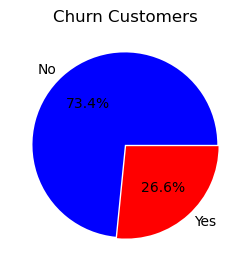

In [19]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(3,3))
ax.pie(x=churn_s.values,labels=churn_s.index, autopct='%1.1f%%',colors=['blue','red'],explode=(0.01,0.01))
ax.set_title('Churn Customers');  # There is only 1 dimension x in pie-fuel_series.values

